In [52]:
#普通的最小二乘法线性回归
import numpy as np

def loadDataSet(fileName):      #general function to parse tab -delimited floats
    numFeat = len(open(fileName).readline().split('\t')) - 1 #get number of fields 
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

def standRegres(xArr,yArr):
    xMat=np.mat(xArr);yMat=np.mat(yArr).T
    if np.linalg.det(xMat.T*xMat)==0.0:
        print u'矩阵不可逆'
    else:
        w=(xMat.T*xMat).I*xMat.T*yMat
        return w

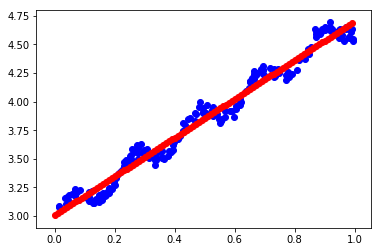

In [54]:
dataMat,labelMat=loadDataSet('ex0.txt')
w=np.array(standRegres(dataMat,labelMat))
from matplotlib import pyplot as plt
xline=np.arange(0.0,1.0,0.01)
yline=xline*w[1]+w[0]
fig=plt.figure()
ax=plt.subplot(111)
ax.scatter([x[1] for x in np.array(dataMat)],np.array(labelMat),c='b')
ax.scatter(xline,yline,color='r',linewidths='1')
plt.show()

In [88]:
#局部加权线性回归
def lwlr(testpoint,xArr,yArr,k=1.0):
    xMat=np.mat(xArr);yMat=np.mat(yArr).T
    weight=np.mat(np.eye(xMat.shape[0]))
    for i in range(xMat.shape[0]):
        weight[i,i]=np.exp((testpoint-xMat[i,:])*(testpoint-xMat[i,:]).T/(-2.0*k**2))
    if np.linalg.det(xMat.T*weight*xMat)==0.0:
        print u'矩阵不可逆'
        return
    else:
        w=(xMat.T*weight*xMat).I*xMat.T*weight*yMat
        yhat=testpoint*w
        return yhat

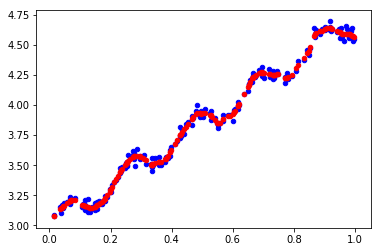

In [109]:
yhat=[0]*len(dataMat)
for i in range(len(dataMat)):
    yhat[i]=np.array(lwlr(dataMat[i],dataMat,labelMat,0.01))
fig=plt.figure()
ax=plt.subplot(111)
ax.scatter([x[1] for x in np.array(dataMat)],np.array(labelMat),c='b',s=20)
ax.scatter([x[1] for x in np.array(dataMat)],yhat,c='r',s=20)
plt.show()

In [223]:
#岭回归参数计算
def ridgeRegress(xMat,yMat,l):
#     xMat=np.mat(xArr);yMat=np.mat(yArr).T
    eyeMat=np.eye(xMat.shape[1])
    if np.linalg.det(xMat.T*xMat+l*eyeMat)==0.0:
        print u'矩阵不可逆'
    else:
        w=(xMat.T*xMat+l*eyeMat).I*xMat.T*yMat
        return w

#整体岭回归
def ridgeTest(xArr,yArr):
    xMat=np.mat(xArr);yMat=np.mat(yArr).T
    #标准化过程
    maxValues=np.max(xMat,axis=0)
    minValues=np.min(xMat,axis=0)
    xstandMat=(xMat-minValues)/(maxValues-minValues)
    testNum=30
    w=np.zeros((testNum,xMat.shape[1]))
    for i in range(testNum):        
        w[i,:]=(ridgeRegress(xstandMat,yMat,np.exp(i-10))).T
    return w

In [224]:
#测试
abX,abY=loadDataSet('abalone.txt')
w=ridgeTest(abX,abY)
print w

[[  4.43703474e-01   6.04183716e+00   7.95830216e+00   2.07989538e+01
    2.44970161e+01  -3.20962390e+01  -9.17043734e+00   5.92782673e+00]
 [  4.43704351e-01   6.04188554e+00   7.95838428e+00   2.07981642e+01
    2.44942826e+01  -3.20947356e+01  -9.16966390e+00   5.92897884e+00]
 [  4.43706735e-01   6.04201705e+00   7.95860745e+00   2.07960182e+01
    2.44868551e+01  -3.20906505e+01  -9.16756230e+00   5.93210929e+00]
 [  4.43713213e-01   6.04237464e+00   7.95921367e+00   2.07901873e+01
    2.44666865e+01  -3.20795568e+01  -9.16185564e+00   5.94060891e+00]
 [  4.43730804e-01   6.04334745e+00   7.96085851e+00   2.07743561e+01
    2.44120191e+01  -3.20494805e+01  -9.14638819e+00   5.96364108e+00]
 [  4.43778482e-01   6.04599736e+00   7.96530721e+00   2.07314628e+01
    2.42645664e+01  -3.19683073e+01  -9.10467194e+00   6.02571994e+00]
 [  4.43907069e-01   6.05323889e+00   7.97723700e+00   2.06158920e+01
    2.38720433e+01  -3.17518623e+01  -8.99364849e+00   6.19064718e+00]
 [  4.4424914

In [274]:
#前向逐步回归
def stageWise(xArr,yArr,eps=0.01,numIt=100):
    xMat=np.mat(xArr);yMat=np.mat(yArr).T
    #标准化过程
    yMean = np.mean(yMat,0)
    yMat = yMat - yMean
    maxValues=np.max(xMat,axis=0)
    minValues=np.min(xMat,axis=0)
#     xstandMat=(xMat-minValues)/(maxValues-minValues)
    xstandMat= regularize(xMat)
    ws=np.zeros((xMat.shape[1],1));wstemp=ws.copy()
    for iterNum in range(numIt):
        lowestE=np.inf
        for feat in range(xMat.shape[1]):
            wstemppos=ws.copy()
            wstempneg=ws.copy()
            wstemppos[feat]+=eps
            wstempneg[feat]-=eps
            posError=(xstandMat*wstemppos-yMat).T*(xstandMat*wstemppos-yMat)
            negError=(xstandMat*wstempneg-yMat).T*(xstandMat*wstempneg-yMat)
            if posError[0,0]<negError[0,0] and posError[0,0]<lowestE:
                wstemp=wstemppos.copy()
                lowestE=posError
            if negError[0,0]<posError[0,0] and negError[0,0]<lowestE:
                wstemp=wstempneg.copy()
                lowestE=negError
        ws=wstemp.copy()
    return ws

In [276]:
#测试
abX,abY=loadDataSet('abalone.txt')
w=stageWise(abX,abY,0.01,1000)
print w

[[ 0.05]
 [ 0.  ]
 [ 0.09]
 [ 0.03]
 [ 0.31]
 [-0.64]
 [ 0.  ]
 [ 0.36]]


In [268]:
def rssError(yArr,yHatArr): #yArr and yHatArr both need to be arrays
    return ((yArr-yHatArr)**2).sum()

def regularize(xMat):#regularize by columns
    inMat = xMat.copy()
    inMeans = np.mean(inMat,0)   #calc mean then subtract it off
    inVar = np.var(inMat,0)      #calc variance of Xi then divide by it
    inMat = (inMat - inMeans)/inVar
    return inMat
def stageWise(xArr,yArr,eps=0.01,numIt=100):
    xMat = np.mat(xArr); yMat=np.mat(yArr).T
#     yMean = np.mean(yMat,0)
#     yMat = yMat - yMean     #can also regularize ys but will get smaller coef
    xMat = regularize(xMat)
    m,n=np.shape(xMat)
    returnMat = np.zeros((numIt,n)) #testing code remove
    ws = np.zeros((n,1)); wsTest = ws.copy(); wsMax = ws.copy()
    for i in range(numIt):
        lowestError = np.inf; 
        for j in range(n):
            for sign in [-1,1]:
                wsTest = ws.copy()
                wsTest[j] += eps*sign
                yTest = xMat*wsTest
                rssE = rssError(yMat.A,yTest.A)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:]=ws.T
    return returnMat

#测试
abX,abY=loadDataSet('abalone.txt')
w=stageWise(abX,abY,0.01,1000)
print w

[[ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.    0.    0.   ...,  0.    0.    0.  ]
 ..., 
 [ 0.05  0.    0.09 ..., -0.64  0.    0.36]
 [ 0.04  0.    0.09 ..., -0.64  0.    0.36]
 [ 0.05  0.    0.09 ..., -0.64  0.    0.36]]
